In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
import pandas as pd
from glob import glob
from scipy.interpolate import interp2d, RectBivariateSpline
from scipy.ndimage import rotate

In [5]:
image_dir = "/Volumes/d1/dgagne/arm_tsi_sgp/"
images = sorted(glob(image_dir + "*.jpg"))


In [ ]:
image_data = np.zeros((len(images), 480, 480, 3), dtype="uint8")
for i, image_file in enumerate(images):
     image_data[i] = imread(image_file)[75:-85]

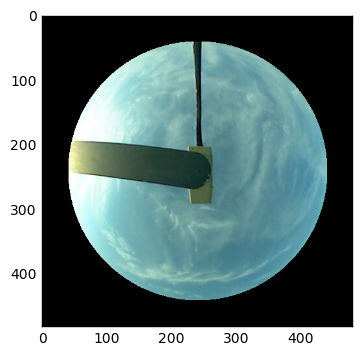

In [36]:
plt.imshow(image_data[0] * dist_from_center_3.astype("uint8"))

In [6]:
img2 = imread(images[0])

In [6]:
x = cols - 240
y = rows - 240
r= np.sqrt((rows - 240) ** 2 + (cols - 240) ** 2)
theta = np.arctan2(y, x)

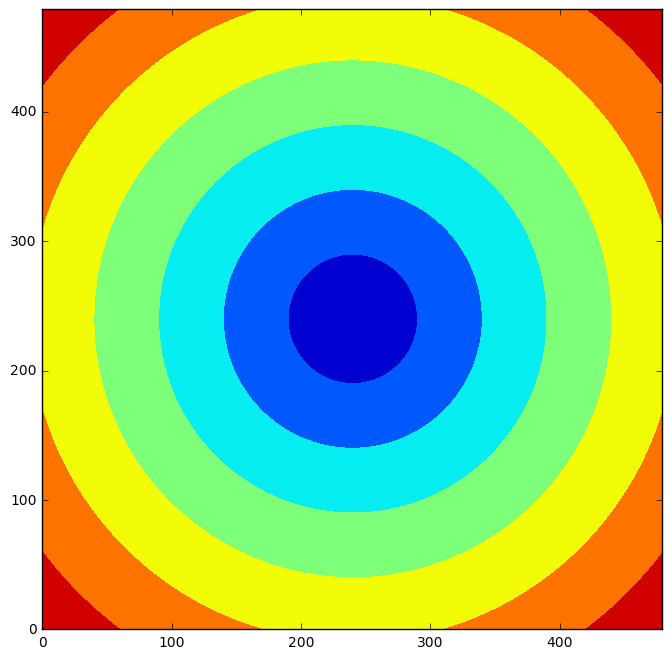

In [8]:
rows, cols = np.indices((480,480))
dist_from_center = np.sqrt((rows - 240) ** 2 + (cols - 240) ** 2)
dist_from_center_3 = np.repeat(np.where(dist_from_center.reshape(480, 480, 1) < 240,1, 0), 3, axis=2).astype("uint8")
plt.figure(figsize=(8, 8))
plt.contourf(dist_from_center)

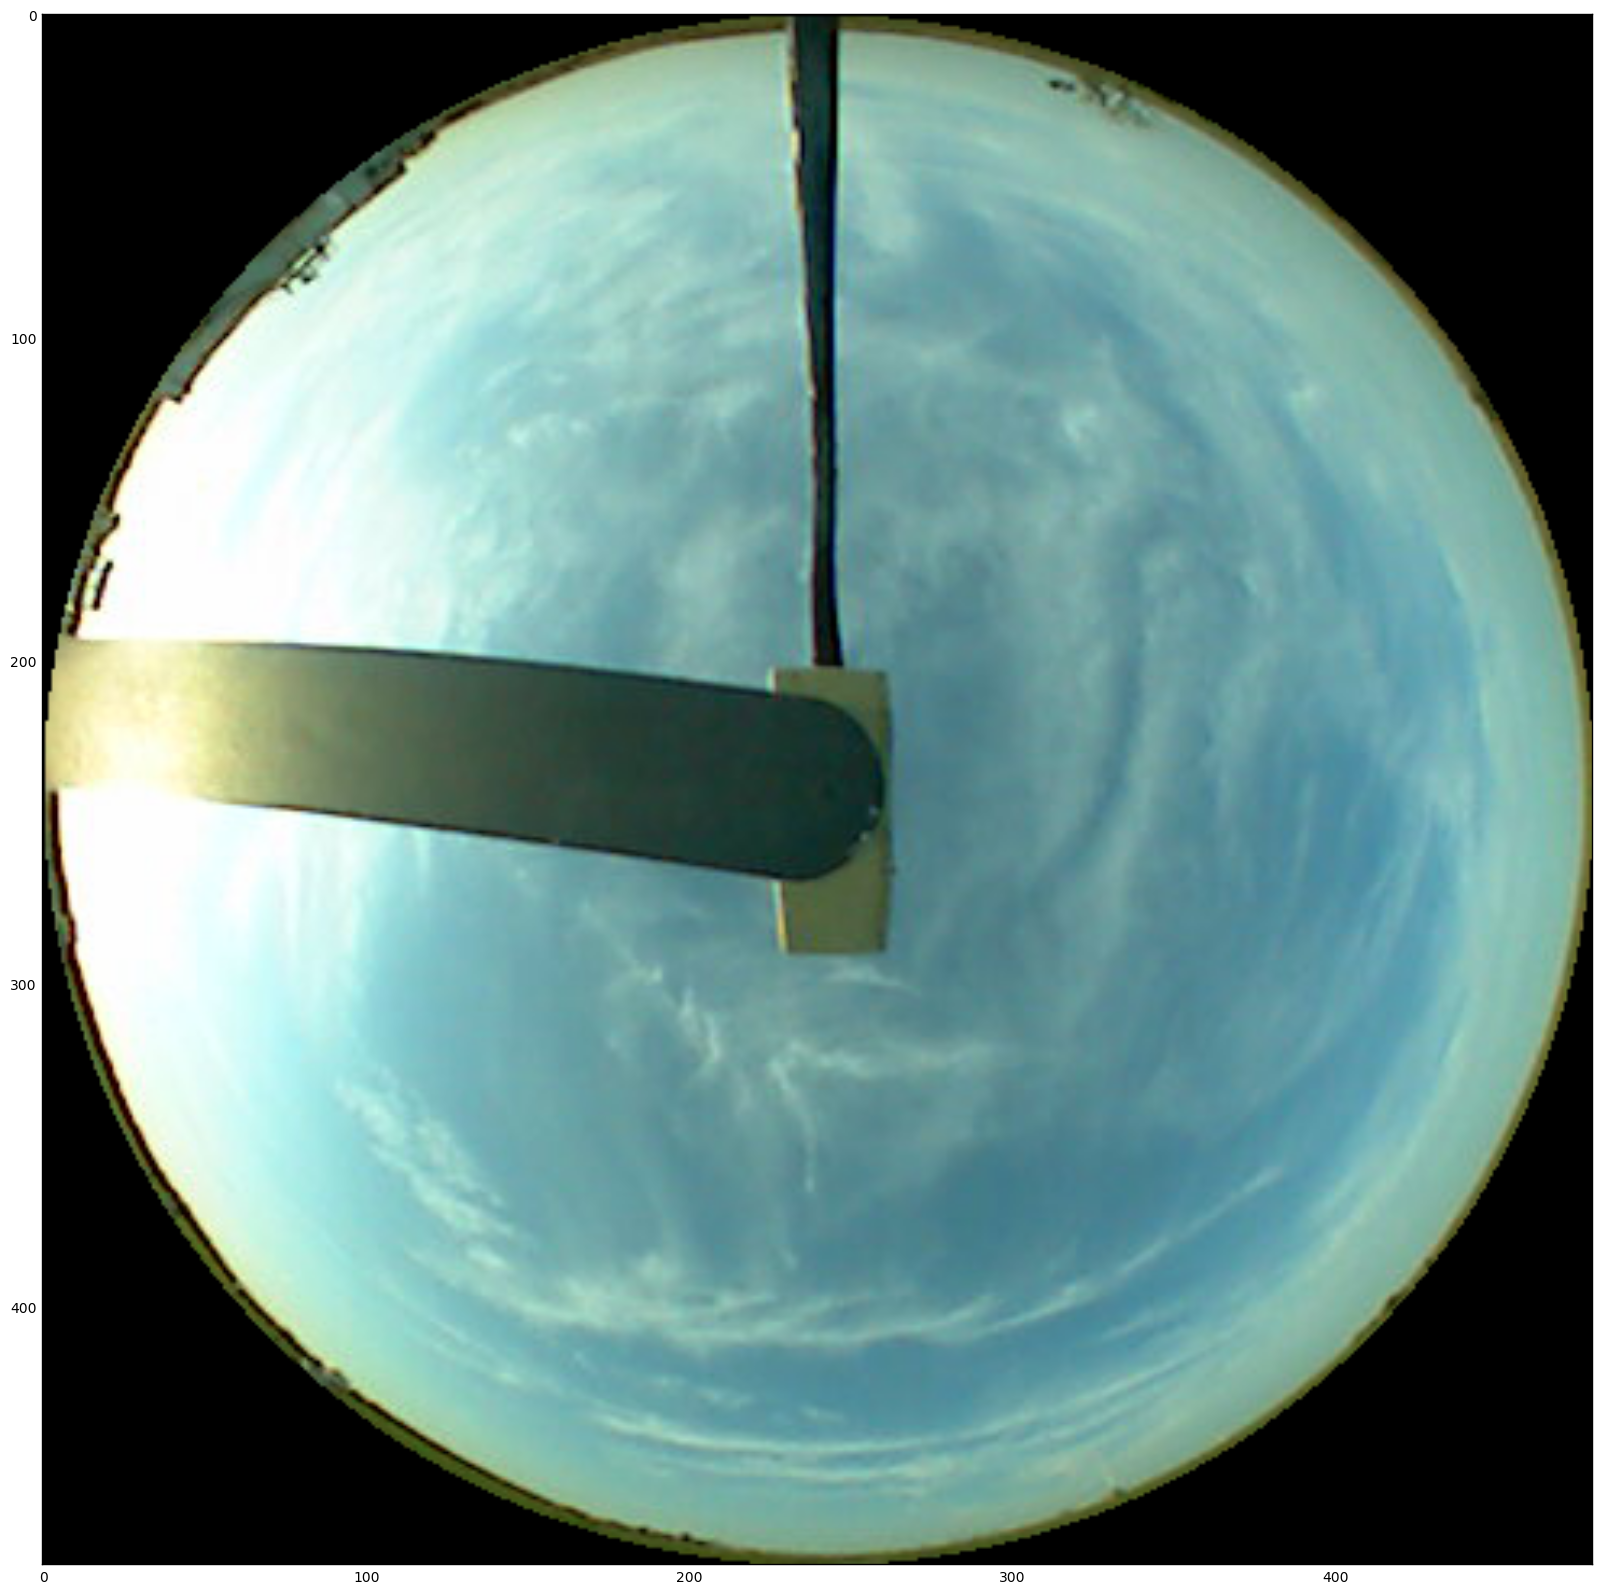

In [18]:
plt.figure(figsize=(20, 20))
plt.imshow(img2[75:-85] * dist_from_center_3)

In [65]:
img2[75]

(480, 480)

In [ ]:
r_i = np.arange(0, 239)
theta_i = np.arange(-180, 180.5, 0.5)
r_i_g, theta_i_g = np.meshgrid(r_i, theta_i)
x_i_g = r_i_g * np.cos(np.radians(theta_i_g))
y_i_g = r_i_g * np.sin(np.radians(theta_i_g))
f = RectBivariateSpline(x[0], y[:,0], img2[75:-85, :, 0] * dist_from_center_3[:, :, 0])
img2_i = f(x_i_g.ravel(), y_i_g.ravel()).reshape(r_i_g.shape)

In [73]:
y[:, 0]

array([-240, -239, -238, -237, -236, -235, -234, -233, -232, -231, -230,
       -229, -228, -227, -226, -225, -224, -223, -222, -221, -220, -219,
       -218, -217, -216, -215, -214, -213, -212, -211, -210, -209, -208,
       -207, -206, -205, -204, -203, -202, -201, -200, -199, -198, -197,
       -196, -195, -194, -193, -192, -191, -190, -189, -188, -187, -186,
       -185, -184, -183, -182, -181, -180, -179, -178, -177, -176, -175,
       -174, -173, -172, -171, -170, -169, -168, -167, -166, -165, -164,
       -163, -162, -161, -160, -159, -158, -157, -156, -155, -154, -153,
       -152, -151, -150, -149, -148, -147, -146, -145, -144, -143, -142,
       -141, -140, -139, -138, -137, -136, -135, -134, -133, -132, -131,
       -130, -129, -128, -127, -126, -125, -124, -123, -122, -121, -120,
       -119, -118, -117, -116, -115, -114, -113, -112, -111, -110, -109,
       -108, -107, -106, -105, -104, -103, -102, -101, -100,  -99,  -98,
        -97,  -96,  -95,  -94,  -93,  -92,  -91,  -

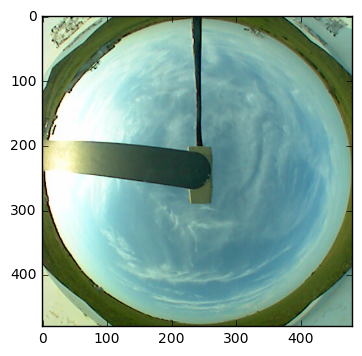

In [27]:
plt.imshow(img2[75:-85])

In [28]:
img2[75:-85].shape

(480, 480, 3)

In [19]:
img2

array([[[ 41,  68,  27],
        [ 36,  63,  22],
        [ 34,  59,  19],
        ..., 
        [ 28,  50,   4],
        [ 26,  48,   2],
        [ 39,  60,  17]],

       [[ 32,  57,  17],
        [ 29,  54,  14],
        [ 31,  53,  14],
        ..., 
        [ 36,  58,   9],
        [ 33,  55,   8],
        [ 42,  64,  17]],

       [[ 30,  52,  13],
        [ 27,  48,   9],
        [ 30,  48,   8],
        ..., 
        [ 41,  64,  10],
        [ 37,  60,   6],
        [ 39,  59,   8]],

       ..., 
       [[ 28,  40,  20],
        [ 18,  30,   6],
        [  9,  23,   0],
        ..., 
        [108,  74,  29],
        [ 67,  34,   0],
        [ 61,  39,   0]],

       [[ 29,  34,  27],
        [ 22,  28,  14],
        [ 21,  29,   5],
        ..., 
        [100,  83,  29],
        [ 70,  57,   2],
        [ 43,  37,   0]],

       [[ 26,  24,  25],
        [ 24,  24,  16],
        [ 32,  33,  15],
        ..., 
        [ 73,  71,  10],
        [ 65,  74,   7],
        [ 36,  49,

(array([ 41154.,  31710.,  11475.,   5305.,   9129.,  44014.,  89448.,
         40067.,  14741.,  20157.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

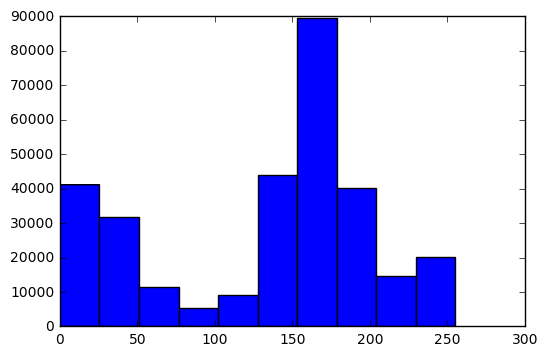

In [23]:
plt.hist(img2[:, :, 2].ravel())

In [26]:
img2gs = rgb2gray(img2)

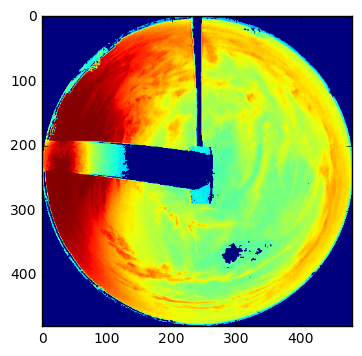

In [39]:
plt.imshow(np.where(img2[75:-85,:,0] * dist_from_center_3[:, :, 0] < 70, 0, img2gs[75:-85]))

In [38]:
threshold_otsu(img2[75:-85, :, 0] * dist_from_center_3[:, :, 0])

70

In [40]:
img2

array([[[ 41,  68,  27],
        [ 36,  63,  22],
        [ 34,  59,  19],
        ..., 
        [ 28,  50,   4],
        [ 26,  48,   2],
        [ 39,  60,  17]],

       [[ 32,  57,  17],
        [ 29,  54,  14],
        [ 31,  53,  14],
        ..., 
        [ 36,  58,   9],
        [ 33,  55,   8],
        [ 42,  64,  17]],

       [[ 30,  52,  13],
        [ 27,  48,   9],
        [ 30,  48,   8],
        ..., 
        [ 41,  64,  10],
        [ 37,  60,   6],
        [ 39,  59,   8]],

       ..., 
       [[ 28,  40,  20],
        [ 18,  30,   6],
        [  9,  23,   0],
        ..., 
        [108,  74,  29],
        [ 67,  34,   0],
        [ 61,  39,   0]],

       [[ 29,  34,  27],
        [ 22,  28,  14],
        [ 21,  29,   5],
        ..., 
        [100,  83,  29],
        [ 70,  57,   2],
        [ 43,  37,   0]],

       [[ 26,  24,  25],
        [ 24,  24,  16],
        [ 32,  33,  15],
        ..., 
        [ 73,  71,  10],
        [ 65,  74,   7],
        [ 36,  49,